## [ 지도 학습]
---
- `지도 학습(supervised learning)` : 
    - 주어진 입력으로부터 출력을 예측하고자 할 때 사용한다.
    - 입력/출력 샘플 데이터, 즉 훈련 세트로부터 머신러닝 모델을 만든다.
    - 종종 훈련 데이터를 만드는 데 사람의 노력이 필요하지만 자동화하면 힘들고 어려운 작업의 속도를 높일 수 있다.

---
### [ 1. 분류와 회귀 ]
- `분류(classification)` : 미리 정의된, 가능성 있는 여러 `클래스 레이블(class label)`중 하나를 예측하는 것
    - `이진 분류(binary classification)` : 두개의 클래스로 분류 (ex. yes/no)
        - `양성(positive)` 클래스 : 학습하고자하는 대상 (ex. 스팸메일입니까? -> 스팸메일 클래스 = 양성)
        - `음성(negative)` 클래스 : 나머지 
    - `다중 분류(multiclass classification)` : 셋 이상의 클래스로 분류 (ex. 붓꽃, 웹사이트의 언어 예측)
    
    
- `회귀(regression)` : 연속적인 숫자, 또는 `부동소수점수(실수)`를 예측하는 것 
    - ex1. 어떤 사람의 교육 수준,나이,주거지로 연간 소득(숫자,양) 예측
    - ex2. 옥수수 농장에서 전년도 수확량과 날씨, 고용 인원수등으로 올해 수확량(숫자)을 예측
    - 예상 출력 값 사이에 연속성이 있다면 회귀 문제에 해당한다.

---
### [ 2. 일반화, 과대적합, 과소적합 ]

#### (1) 일반화, 과대적합, 과소적합

> 지도학습에서 훈련 데이터로 학습한 모델이 훈련 데이터와 특성이 같다면  
> 처음 보는 새로운 데이터가 주어져도 정확히 예측할 거라 기대한다.

- `일반화(generalization)` : 
    - 모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있는 경우,   
이를 훈련 세트에서 테스트세트로 일반화되었다고 한다.

> 모델을 복잡하게 할수록 훈련 데이터에 대해서는 더 정확히 예측할 수 있다.  
> 그러나 너무 복잡해지면 훈련 세트의 각 데이터 포인트에 너무 민감해져 새로운 데이터에 잘 일반화되지 못한다!
>  
> ☑ 찾아야 하는 모델은 일반화 성능이 최대가 되는 최적점에 있는 모델이다.

- `과대적합(overfitting)` :
    - 가진 정보를 모두 사용해서 너무 복잡한 모델을 만드는 것
    - 모델이 훈련 세트의 샘플에 너무 가깝게 맞춰져서 새로운 데이터에 일반화되기 어려울 때 일어난다.
- `과소적합(underfitting)` :
    - 과대적합과 반대로 너무 간단한 모델이 선택되는 것
    

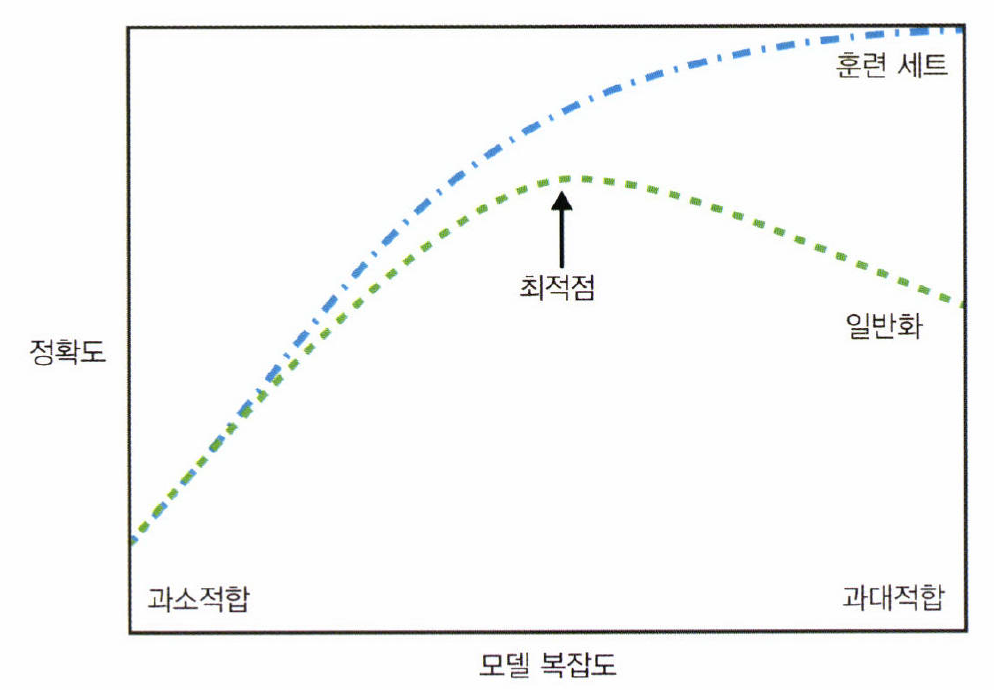

#### (2) 모델 복잡도와 데이터셋 크기의 관계

- `모델 복잡도`는 훈련 데이터셋에 담긴 `입력 데이터의 다양성`과 관련이 깊다.
    - 데이터셋에 다양한 데이터 포인트 多 -> 과대적합이 없는 더 복잡도 있는 모델 만들 가능성 up  
    ( 테스트 샘플에서도 예측을 잘하며 모델이 좀더 세밀해진다는 의미)
    - But, 같은 데이터 포인트를 중복하거나 매우 비슷한 데이터를 모으는 것은 도움x

---
### [ 3. 지도 학습 알고리즘 ]
#### (1) 예제에 사용할 데이터셋
#### (1-1) `forge` 데이터셋
- 두 개의 특성을 가진 `forge` 데이터셋은 인위적으로 만든 이진 분류 데이터셋이다.

X.shape (26, 2)


C:\Users\jhryu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


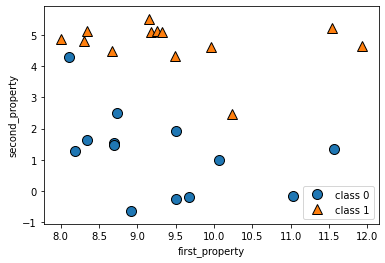

In [36]:
import numpy as np
import pandas as ps
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn

# 데이터셋을 만든다.
X, y = mglearn.datasets.make_forge()
# 산점도를 그린다.
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) #  X는 데이터값 y는 데이터레이블을 의미함
plt.legend(['class 0','class 1'], loc = 4)    # loc옵션은 legend의 위치를 나타낸다.
plt.xlabel('first_property')
plt.ylabel('second_property')

print('X.shape', X.shape)

# 발생하는 오류는 mglearn을 만드신 분이 무시해도 상관없다고함...

> `X.shape`값에서 알 수 있듯이 이 데이터셋은 데이터 포인트 26개와 특성 2개를 가진다.

#### (1-2) `wave` 데이터셋
- 회귀 알고리즘 설명에는 인위적으로 만든 `wave` 데이터셋을 사용한다.
- `wave` 데이터셋은 입력 특성 하나와 모델링할 타깃 변수(또는 응답)을 가진다.

Text(0, 0.5, 'target')

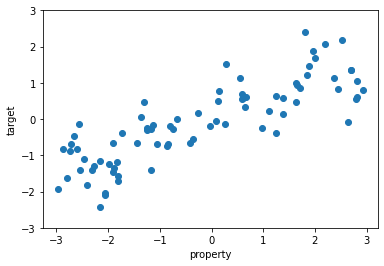

In [38]:
X, y = mglearn.datasets.make_wave(n_samples=80)     # n_samples옵션은 데이터 셈플의 갯수
plt.plot(X,y,'o')                                   # X[n,0]의 짝 y[n]
plt.ylim(-3, 3)                                     # y축 범위
plt.xlabel('property')
plt.ylabel('target')
# for i, v in enumerate(X):
#     plt.text(v, y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
#              fontsize = 9, 
#              color='blue',
#              horizontalalignment='center',  # horizontalalignment (left, center, right)
#              verticalalignment='bottom')    # verticalalignment (top, center, bottom)

#### (1-3) `cancer` 데이터셋
- 인위적인 소규모 데이터셋 외에 `scikit-learn`에 들어 있는 유방암 종양의 임상 데이터를 기록해놓은 위스콘신 유방암 데이터셋(`cancer`)이다.
    - 각 종양은 양성과 악성으로 레이블되어 있고
    - 조직 데이터를 기반으로 종양이 악성인지를 예측할 수 있도록 학습하는 것이 과제이다.
  
  
- 이 데이터는 `scikit-learn`에 있는 `load_breast_cancer` 함수에서 로드하여 쓸 수 있다.

In [40]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('cancer.keys():\n', cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [41]:
print('유방암 데이터의 형태 :', cancer.data.shape)

유방암 데이터의 형태 : (569, 30)


- 569개의 데이터 포인트를 가지고 있고 특성은 30개이다.

In [47]:
# p62 쪽 여기서 부터 다시 시작!!!!!!!!!!!!!!!!!!!!!!!!

print('클래스별 샘플 개수 :', 
         {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수 : {'malignant': 212, 'benign': 357}
